In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader import data as pdr

stuff

In [2]:
TMFsim = pd.read_csv("./data/TMFSIM.csv")
UPROsim = pd.read_csv("./data/UPROSIM.csv")
LEV = 3

UPROsim["UPRO"] = UPROsim["UPRO"].str.replace("%", "").astype("float")
TMFsim["TMF"] = TMFsim["TMF"].str.replace("%", "").astype("float")
FFR = pd.read_csv("./data/FFR.csv")

FFR['Date'] = pd.to_datetime(FFR['Date'], format='%Y-%m-%d')
# Cost of borrowing to achieve 3x exposure:
FFR['Borrow cost'] = (1 + (LEV-1)*FFR['FFR']) ** (1/30) - 1
FFR.drop(columns=["FFR"], inplace=True)
FFR

,Date,Borrow cost
0,1954-07-01,0.032363
1,1954-08-01,0.042042
2,1954-09-01,0.038877
3,1954-10-01,0.033663
4,1954-11-01,0.033148
...,...,...
831,2023-10-01,0.085317
832,2023-11-01,0.085317
833,2023-12-01,0.085317
834,2024-01-01,0.085317


In [3]:
TMFsim['Date'] = pd.to_datetime(TMFsim['Date'], format='%m/%d/%y')

UPROsim['Date'] = pd.to_datetime(UPROsim['Date'], format='%m/%d/%y')
UPROsim.rename(columns={'UPRO': 'UPRO_sim'}, inplace=True)
TMFsim.rename(columns={'TMF': 'TMF_sim'}, inplace=True)

display(TMFsim.iloc[:, :-1].head())
display(UPROsim.iloc[:, :-1].head())


,Date,TMF_sim
0,1986-05-20,-0.6
1,1986-05-21,3.0
2,1986-05-22,-0.6
3,1986-05-23,0.6
4,1986-05-27,1.3


,Date,UPRO_sim
0,1986-05-20,3.7
1,1986-05-21,-0.7
2,1986-05-22,5.9
3,1986-05-23,1.4
4,1986-05-27,4.2


In [4]:
spy = yf.Ticker("SPY")
spy.info

{'longBusinessSummary': 'The Trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index (the “Portfolio”), with the weight of each stock in the Portfolio substantially corresponding to the weight of such stock in the index.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 511.72,
 'open': 510.48,
 'dayLow': 508.5,
 'dayHigh': 511.88,
 'regularMarketPreviousClose': 511.72,
 'regularMarketOpen': 510.48,
 'regularMarketDayLow': 508.5,
 'regularMarketDayHigh': 511.88,
 'trailingPE': 25.755463,
 'volume': 62311684,
 'regularMarketVolume': 62311684,
 'averageVolume': 77243326,
 'averageVolume10days': 65259340,
 'averageDailyVolume10Day': 65259340,
 'bid': 511.25,
 'ask': 511.26,
 'bidSize': 900,
 'askSize': 1300,
 'yield': 0.012999999,
 'totalAssets': 503321591808,
 'fiftyTwoWeekLow': 380.65,
 'fiftyTwoWeekHigh': 518.22,
 'fiftyDayAverage': 491.0316,
 'twoHundredDayAverage': 454.0651,
 'trailingAnnualDividendRate': 5.662,


In [5]:
HFEA = yf.Tickers("spy tlt")
spy = HFEA.tickers["SPY"]
tlt = HFEA.tickers["TLT"]

In [6]:
yf.pdr_override()
real_data = yf.download("SPY TLT")

[*********************100%%**********************]  2 of 2 completed


In [7]:
real_data

Price        Adj Close                  Close                   High  \
Ticker             SPY        TLT         SPY        TLT         SPY   
Date                                                                   
1993-01-29   24.840679        NaN   43.937500        NaN   43.968750   
1993-02-01   25.017355        NaN   44.250000        NaN   44.250000   
1993-02-02   25.070374        NaN   44.343750        NaN   44.375000   
1993-02-03   25.335361        NaN   44.812500        NaN   44.843750   
1993-02-04   25.441374        NaN   45.000000        NaN   45.093750   
...                ...        ...         ...        ...         ...   
2024-03-05  507.179993  95.430000  507.179993  95.430000  510.700012   
2024-03-06  509.750000  95.989998  509.750000  95.989998  512.070007   
2024-03-07  514.809998  95.900002  514.809998  95.900002  515.890015   
2024-03-08  511.720001  95.730003  511.720001  95.730003  518.219971   
2024-03-11  511.279999  95.680000  511.279999  95.680000  511.880005   

Price                         Low                   Open               Volume  \
Ticker            TLT         SPY        TLT         SPY        TLT       SPY   
Date                                                                            
1993-01-29        NaN   43.750000        NaN   43.968750        NaN   1003200   
1993-02-01        NaN   43.968750        NaN   43.968750        NaN    480500   
1993-02-02        NaN   44.125000        NaN   44.218750        NaN    201300   
1993-02-03        NaN   44.375000        NaN   44.406250        NaN    529400   
1993-02-04        NaN   44.468750        NaN   44.968750        NaN    531500   
...               ...         ...        ...         ...        ...       ...   
2024-03-05  95.680000  504.910004  94.970001  510.239990  95.230003  72855600   
2024-03-06  96.169998  508.420013  95.410004  510.549988  95.489998  68382400   
2024-03-07  96.400002  509.809998  95.480003  513.140015  96.360001  58652100   
2024-03-08  96.050003  511.130005  95.480003  515.460022  95.800003  86425500   
2024-03-11  96.004997  508.500000  95.370003  510.480011  95.959999  62311684   

Price                   
Ticker             TLT  
Date                    
1993-01-29         NaN  
1993-02-01         NaN  
1993-02-02         NaN  
1993-02-03         NaN  
1993-02-04         NaN  
...                ...  
2024-03-05  37721900.0  
2024-03-06  40571600.0  
2024-03-07  39075000.0  
2024-03-08  25014500.0  
2024-03-11  17237972.0  

[7834 rows x 12 columns]

In [8]:
real_data.columns

MultiIndex([('Adj Close', 'SPY'),
            ('Adj Close', 'TLT'),
            (    'Close', 'SPY'),
            (    'Close', 'TLT'),
            (     'High', 'SPY'),
            (     'High', 'TLT'),
            (      'Low', 'SPY'),
            (      'Low', 'TLT'),
            (     'Open', 'SPY'),
            (     'Open', 'TLT'),
            (   'Volume', 'SPY'),
            (   'Volume', 'TLT')],
           names=['Price', 'Ticker'])

In [15]:
def leverage(df, tickers, lev = 1):
    pct_change_list = []

    for index, letf in tickers.items():
        if ('Close', index) in df.columns:
            # Calculate percentage change for the specified ticker's 'Close' price
            pct_change_series = df['Close', index].pct_change() * 100 * lev  # Multiply by 100 to convert to percentage
            pct_change_series.name = f"{lev}x{index}"  # Rename the Series for clarity
            pct_change_list.append(pct_change_series)

    # Concatenate all the percentage change Series into a single DataFrame
    if pct_change_list:
        pct_change_df = pd.concat(pct_change_list, axis=1)
        pct_change_df.index.name = 'Date'  # Assuming the DataFrame's index is Date
        # Reset index to turn the Date index into a column
        pct_change_df.reset_index(inplace=True)
        return pct_change_df
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no tickers were found or provided

In [16]:
tickers = {'SPY': 'UPRO', 'TLT': 'TMF'}
pct_change_df = leverage(real_data, tickers , LEV)
pct_change_df = leverage(real_data, tickers, LEV)
pct_change_df['Date'] = pd.to_datetime(pct_change_df['Date'])
pct_change_df = pd.merge_asof(pct_change_df.sort_values('Date'),
                            FFR.sort_values('Date'),
                            on='Date',
                            direction='backward')
pct_change_df['UPRO_ours'] = pct_change_df[f'{LEV}xSPY'] - pct_change_df['Borrow cost']
print(pct_change_df)

           Date     3xSPY     3xTLT  Borrow cost  UPRO_ours
0    1993-01-29       NaN       NaN     0.067216        NaN
1    1993-02-01  2.133713       NaN     0.067317   2.066396
2    1993-02-02  0.635593       NaN     0.067317   0.568276
3    1993-02-03  3.171247       NaN     0.067317   3.103930
4    1993-02-04  1.255230       NaN     0.067317   1.187913
...         ...       ...       ...          ...        ...
7829 2024-03-05 -2.998240  4.272518     0.085317  -3.083557
7830 2024-03-06  1.520175  1.760445     0.085317   1.434858
7831 2024-03-07  2.977929 -0.281268     0.085317   2.892612
7832 2024-03-08 -1.800662 -0.531798     0.085317  -1.885979
7833 2024-03-11 -0.257955 -0.156700     0.085317  -0.343272

[7834 rows x 5 columns]


In [11]:
joined_df = pd.merge(pct_change_df, TMFsim.iloc[:, :-1], on='Date', how='outer')
joined_df = pd.merge(joined_df, UPROsim.iloc[:, :-1], on='Date', how='outer')
joined_df.set_index(joined_df.columns[0], inplace=True)

joined_df.sort_values(by='Date', inplace=True)
joined_df[5500:6000]

,3xSPY,3xTLT,Borrow cost,UPRO_ours,TMF_sim,UPRO_sim
Date,,,,,,
2008-03-11,10.781264,-2.564362,0.062820,10.718444,-3.6,11.1
2008-03-12,-2.805442,5.787264,0.062820,-2.868262,4.9,-2.7
2008-03-13,0.662287,-2.347237,0.062820,0.599467,-2.3,1.5
2008-03-14,-4.648675,3.708452,0.062820,-4.711495,3.3,-6.3
2008-03-17,-3.032168,2.305274,0.062820,-3.094988,1.0,-2.7
...,...,...,...,...,...,...
2010-02-26,0.189752,1.546057,0.007733,0.182019,1.8,0.4
2010-03-01,3.115410,-1.079967,0.009297,3.106112,0.3,3.0
2010-03-02,0.831167,-0.394116,0.009297,0.821870,-0.3,0.7


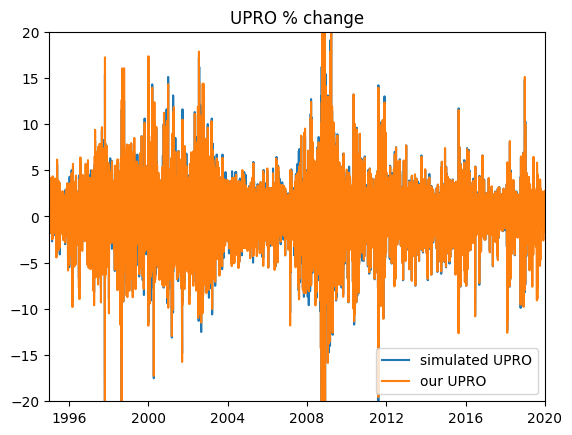

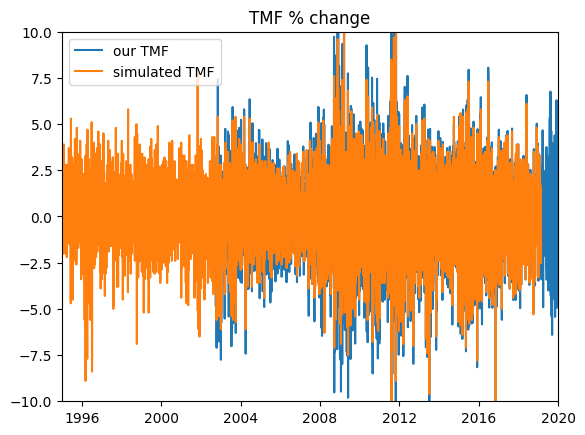

In [12]:
start = "1995"

plt.plot(joined_df["UPRO_sim"], label = "simulated UPRO")
plt.plot(joined_df["UPRO_ours"], label="our UPRO")
# plt.plot(joined_df["3xSPY"], label="3x S&P 500")
plt.legend()
plt.title("UPRO % change")
plt.ylim(-20,20)
plt.xlim(pd.to_datetime(start), pd.to_datetime("2020"))
plt.show()

plt.plot(joined_df["3xTLT"], label="our TMF")
plt.plot(joined_df["TMF_sim"], label = "simulated TMF")
plt.legend()
plt.title("TMF % change")
plt.xlim(6000,18000)
plt.xlim(pd.to_datetime(start), pd.to_datetime("2020"))
plt.ylim(-10,10)
plt.show()

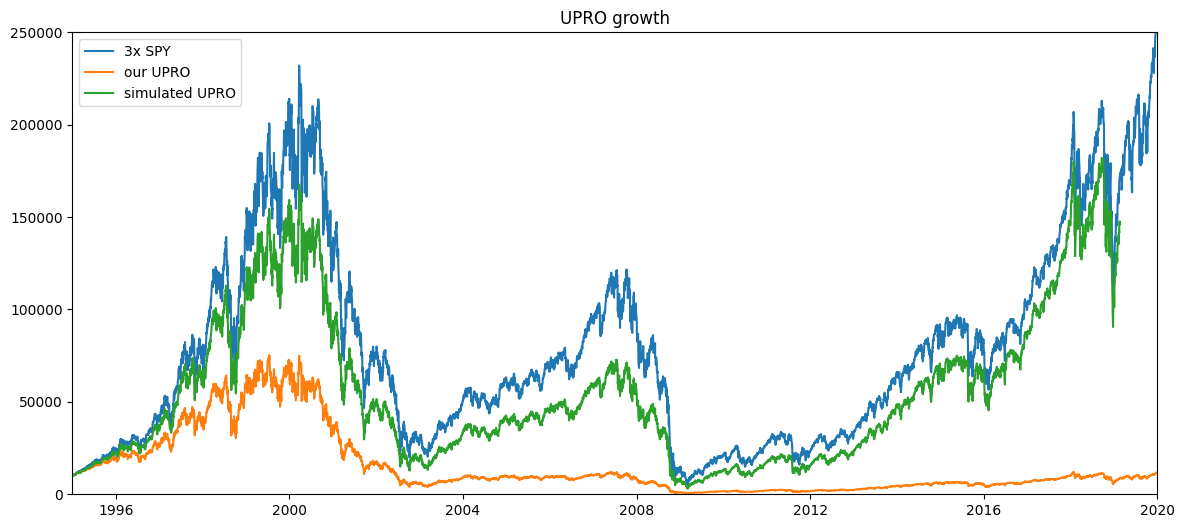

In [13]:
INIT = 10000

def growth(joined_df, start="1970"):
    # Set the first column as the index
    index = joined_df["UPRO_ours"].index.searchsorted(start)
    coeffs = 1 + joined_df.iloc[index:, :] / 100
    return INIT * coeffs.cumprod()

plt.figure(figsize=(14, 6))  # Adjust the width as needed
df = growth(joined_df, "1995")
plt.plot(df["3xSPY"], label="3x SPY")
plt.plot(df["UPRO_ours"], label="our UPRO")
plt.plot(df["UPRO_sim"], label = "simulated UPRO")
plt.title("UPRO growth")
plt.legend()
plt.ylim(0, 250000)
plt.xlim(pd.to_datetime(start), pd.to_datetime("2020"))
plt.show()


# Attempt to simulate UPRO by calculating external cost

In [159]:
yf.pdr_override()
HFEA_data = yf.download("SPY UPRO TLT TMF")

[*********************100%%**********************]  4 of 4 completed


In [160]:
HFEA_data

Price        Adj Close                                        Close  \
Ticker             SPY        TLT        TMF       UPRO         SPY   
Date                                                                  
1993-01-29   24.840689        NaN        NaN        NaN   43.937500   
1993-02-01   25.017359        NaN        NaN        NaN   44.250000   
1993-02-02   25.070345        NaN        NaN        NaN   44.343750   
1993-02-03   25.335377        NaN        NaN        NaN   44.812500   
1993-02-04   25.441381        NaN        NaN        NaN   45.000000   
...                ...        ...        ...        ...         ...   
2024-03-05  507.179993  95.430000  56.939999  64.489998  507.179993   
2024-03-06  509.750000  95.989998  57.880001  65.489998  509.750000   
2024-03-07  514.809998  95.900002  57.630001  67.389999  514.809998   
2024-03-08  511.720001  95.730003  57.389999  66.139999  511.720001   
2024-03-11  511.279999  95.680000  57.240002  65.919998  511.279999   

Price                                              High             ...  \
Ticker            TLT        TMF       UPRO         SPY        TLT  ...   
Date                                                                ...   
1993-01-29        NaN        NaN        NaN   43.968750        NaN  ...   
1993-02-01        NaN        NaN        NaN   44.250000        NaN  ...   
1993-02-02        NaN        NaN        NaN   44.375000        NaN  ...   
1993-02-03        NaN        NaN        NaN   44.843750        NaN  ...   
1993-02-04        NaN        NaN        NaN   45.093750        NaN  ...   
...               ...        ...        ...         ...        ...  ...   
2024-03-05  95.430000  56.939999  64.489998  510.700012  95.680000  ...   
2024-03-06  95.989998  57.880001  65.489998  512.070007  96.169998  ...   
2024-03-07  95.900002  57.630001  67.389999  515.890015  96.400002  ...   
2024-03-08  95.730003  57.389999  66.139999  518.219971  96.050003  ...   
2024-03-11  95.680000  57.240002  65.919998  511.880005  96.004997  ...   

Price             Low                   Open                                   \
Ticker            TMF       UPRO         SPY        TLT        TMF       UPRO   
Date                                                                            
1993-01-29        NaN        NaN   43.968750        NaN        NaN        NaN   
1993-02-01        NaN        NaN   43.968750        NaN        NaN        NaN   
1993-02-02        NaN        NaN   44.218750        NaN        NaN        NaN   
1993-02-03        NaN        NaN   44.406250        NaN        NaN        NaN   
1993-02-04        NaN        NaN   44.968750        NaN        NaN        NaN   
...               ...        ...         ...        ...        ...        ...   
2024-03-05  56.110001  63.630001  510.239990  95.230003  56.599998  65.709999   
2024-03-06  56.869999  64.970001  510.549988  95.489998  57.029999  65.790001   
2024-03-07  56.930000  66.339996  513.140015  96.360001  58.520000  66.690002   
2024-03-08  56.900002  65.889999  515.460022  95.800003  57.509998  67.620003   
2024-03-11  56.680000  64.839996  510.480011  95.959999  57.779999  65.599998   

Price         Volume                                     
Ticker           SPY         TLT        TMF        UPRO  
Date                                                     
1993-01-29   1003200         NaN        NaN         NaN  
1993-02-01    480500         NaN        NaN         NaN  
1993-02-02    201300         NaN        NaN         NaN  
1993-02-03    529400         NaN        NaN         NaN  
1993-02-04    531500         NaN        NaN         NaN  
...              ...         ...        ...         ...  
2024-03-05  72855600  37721900.0  7163400.0   6021500.0  
2024-03-06  68382400  40571600.0  8477800.0   6771900.0  
2024-03-07  58652100  39075000.0  5511400.0   5955900.0  
2024-03-08  86425500  25014500.0  4979100.0  11470500.0  
2024-03-11  62311684  17237972.0  4627113.0   8804346.0  

[7834 

In [161]:
tickers = {'SPY': 'UPRO', 'TLT': 'TMF'}
pct_df = leverage(HFEA_data, tickers , LEV)
pct_df = leverage(HFEA_data, tickers, LEV)
pct_df['Date'] = pd.to_datetime(pct_change_df['Date'])
if 'Date' in pct_df.columns:
    pct_df.set_index('Date', inplace=True)
print(pct_df)

               3xSPY     3xTLT
Date                          
1993-01-29       NaN       NaN
1993-02-01  2.133713       NaN
1993-02-02  0.635593       NaN
1993-02-03  3.171247       NaN
1993-02-04  1.255230       NaN
...              ...       ...
2024-03-05 -2.998240  4.272518
2024-03-06  1.520175  1.760445
2024-03-07  2.977929 -0.281268
2024-03-08 -1.800662 -0.531798
2024-03-11 -0.257955 -0.156700

[7834 rows x 2 columns]


In [162]:
upro_pct_change = HFEA_data['Close']['UPRO'].pct_change() * 100
tmf_pct_change = HFEA_data['Close']['TMF'].pct_change() * 100


# Join the new data with the original DataFrame based on 'Date' index
complete_df = pct_df.join(upro_pct_change).join(tmf_pct_change)

# If you want to convert 'Date' back from index to a column
complete_df.reset_index(inplace=True)
if 'Date' in complete_df.columns:
    complete_df.set_index('Date', inplace=True)
complete_df

,3xSPY,3xTLT,UPRO,TMF
Date,,,,
1993-01-29,NaN,NaN,NaN,NaN
1993-02-01,2.133713,NaN,NaN,NaN
1993-02-02,0.635593,NaN,NaN,NaN
1993-02-03,3.171247,NaN,NaN,NaN
1993-02-04,1.255230,NaN,NaN,NaN
...,...,...,...,...
2024-03-05,-2.998240,4.272518,-3.037144,4.228441
2024-03-06,1.520175,1.760445,1.550628,1.650865
2024-03-07,2.977929,-0.281268,2.901209,-0.431928


In [163]:
complete_df

,3xSPY,3xTLT,UPRO,TMF
Date,,,,
1993-01-29,NaN,NaN,NaN,NaN
1993-02-01,2.133713,NaN,NaN,NaN
1993-02-02,0.635593,NaN,NaN,NaN
1993-02-03,3.171247,NaN,NaN,NaN
1993-02-04,1.255230,NaN,NaN,NaN
...,...,...,...,...
2024-03-05,-2.998240,4.272518,-3.037144,4.228441
2024-03-06,1.520175,1.760445,1.550628,1.650865
2024-03-07,2.977929,-0.281268,2.901209,-0.431928


In [164]:
complete_df[5000:6000]

,3xSPY,3xTLT,UPRO,TMF
Date,,,,
2012-12-05,0.530973,-0.143558,0.533743,-0.163549
2012-12-06,1.017659,0.646337,1.108994,0.541841
2012-12-07,0.908595,-2.770912,0.875146,-2.644446
2012-12-10,0.126390,1.326054,0.289193,1.313081
2012-12-11,2.042538,-2.280376,1.937714,-2.274463
...,...,...,...,...
2016-11-16,-0.563501,2.706911,-0.506061,2.757546
2016-11-17,1.542218,-4.414288,1.458972,-4.455698
2016-11-18,-0.671271,-0.866333,-0.659628,-0.847902


In [165]:
complete_df['UPRO_3xSPY diff'] = complete_df['UPRO'] - complete_df['3xSPY']
complete_df

,3xSPY,3xTLT,UPRO,TMF,UPRO_3xSPY diff
Date,,,,,
1993-01-29,NaN,NaN,NaN,NaN,NaN
1993-02-01,2.133713,NaN,NaN,NaN,NaN
1993-02-02,0.635593,NaN,NaN,NaN,NaN
1993-02-03,3.171247,NaN,NaN,NaN,NaN
1993-02-04,1.255230,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-03-05,-2.998240,4.272518,-3.037144,4.228441,-0.038903
2024-03-06,1.520175,1.760445,1.550628,1.650865,0.030453
2024-03-07,2.977929,-0.281268,2.901209,-0.431928,-0.076720


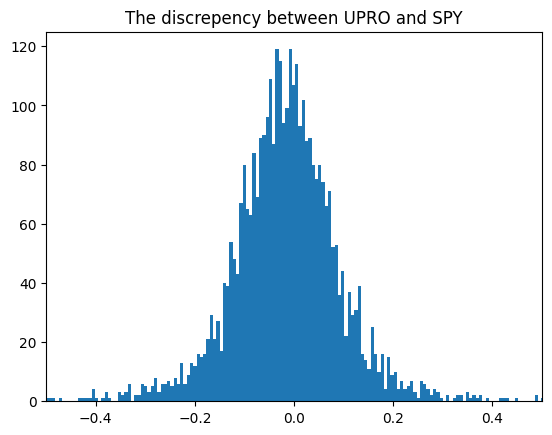

In [166]:
plt.hist(complete_df["UPRO_3xSPY diff"], bins=1000)
plt.xlim(-0.5,0.5)
plt.title("The discrepency between UPRO and SPY")
plt.show()

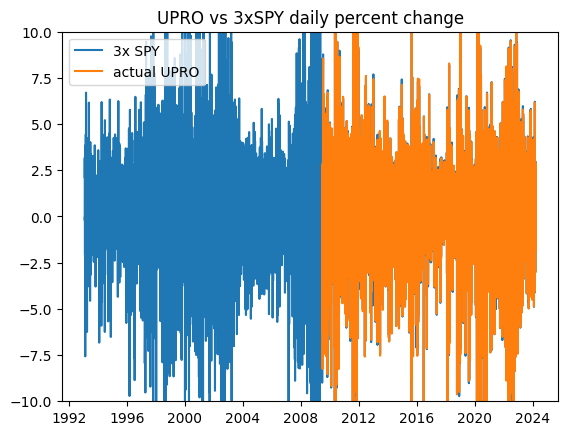

In [167]:
plt.plot(complete_df["3xSPY"], label = "3x SPY")
plt.plot(complete_df["UPRO"], label ="actual UPRO")
plt.ylim(-10,10)
plt.title("UPRO vs 3xSPY daily percent change")
plt.legend()
plt.show()

In [168]:
NUM_TRADING_DAYS = 252

average_diff = complete_df['UPRO_3xSPY diff'].mean()
upro_outperform_count = (complete_df['UPRO_3xSPY diff'] > 0).sum()
upro_underperform_count = (complete_df['UPRO_3xSPY diff'] < 0).sum()
annual_diff = complete_df['UPRO_3xSPY diff'].mean() * NUM_TRADING_DAYS
complete_df["3xSPY corrected"] = complete_df["3xSPY"] + average_diff

print(f"Average daily difference (UPRO - 3xSPY): {average_diff:.4f}%")
print(f"Average annual difference (UPRO - 3xSPY): {annual_diff:.4f}%")
print(f"Days UPRO outperformed 3xSPY: {upro_outperform_count}")
print(f"Days UPRO underperformed 3xSPY: {upro_underperform_count}")

Average daily difference (UPRO - 3xSPY): 0.0056%
Average annual difference (UPRO - 3xSPY): 1.3989%
Days UPRO outperformed 3xSPY: 1617
Days UPRO underperformed 3xSPY: 2084


In [169]:
volatility_upro = complete_df['UPRO'].std()
volatility_3xspy = complete_df['3xSPY'].std()
print(f"Volatility of UPRO: {volatility_upro:.4f}%")
print(f"Volatility of 3xSPY: {volatility_3xspy:.4f}%")

Volatility of UPRO: 3.2653%
Volatility of 3xSPY: 3.5478%


So this is very interesting. According to aggregating over all the years UPRO has been a fund, it seems to outpreform 3x SPY. One would expect this to not be the case do to borrowing costs, the expense ratio, and beta decay. These factors are apparent when looking at the volatility. 3x SPY is more volatile then UPRO meaning that UPRO is not fully able to track 3x SPY to its maximum amount. However, it tracks less which becomes its strength for outperformance (maybe)

In [170]:
oldest_upro_date = complete_df['UPRO'].dropna().index.min()
filtered_df = complete_df[complete_df.index >= oldest_upro_date]
display(filtered_df)
yearly_sum_upro = filtered_df['UPRO'].dropna().resample('YE').sum()
yearly_sum_3xspy = filtered_df['3xSPY'].dropna().resample('YE').sum()

average_annual_change_upro = yearly_sum_upro.sum() / len(yearly_sum_upro)
average_annual_change_3xspy = yearly_sum_3xspy.sum() / len(yearly_sum_3xspy)

print(f"Average annual change of UPRO: {average_annual_change_upro:.4f}%")
print(f"Average annual change of 3X SPY: {average_annual_change_3xspy:.4f}%")

,3xSPY,3xTLT,UPRO,TMF,UPRO_3xSPY diff,3xSPY corrected
Date,,,,,,
2009-06-26,-0.781947,0.508300,-0.518435,0.578598,0.263512,-0.776395
2009-06-29,2.809236,0.444044,2.837223,0.119847,0.027987,2.814787
2009-06-30,-2.427185,-0.506715,-2.387350,-0.598516,0.039834,-2.421633
2009-07-01,1.239820,-1.554397,1.072943,-1.083815,-0.166877,1.245372
2009-07-02,-8.188035,0.701534,-8.252508,1.095690,-0.064473,-8.182484
...,...,...,...,...,...,...
2024-03-05,-2.998240,4.272518,-3.037144,4.228441,-0.038903,-2.992689
2024-03-06,1.520175,1.760445,1.550628,1.650865,0.030453,1.525726
2024-03-07,2.977929,-0.281268,2.901209,-0.431928,-0.076720,2.983480


Average annual change of UPRO: 37.5703%
Average annual change of 3X SPY: 36.2862%


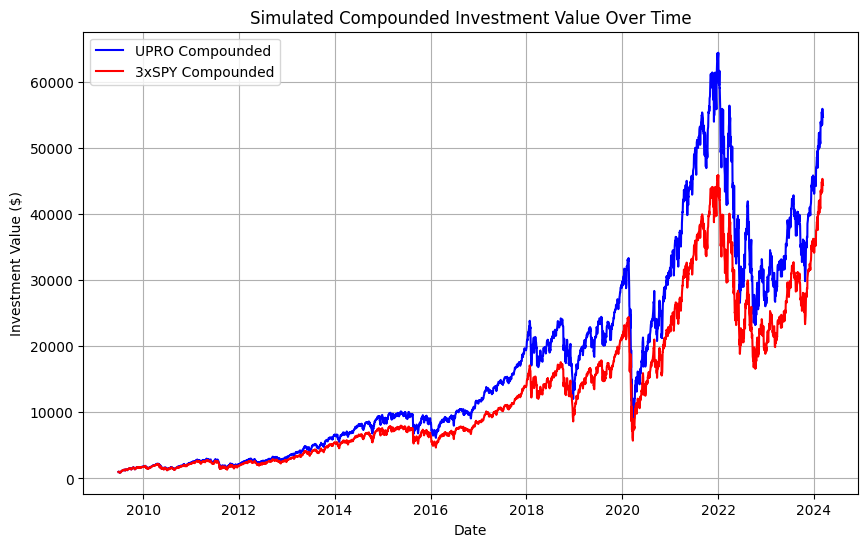

In [171]:
INITIAL_INVESTMENT = 1000

filtered_df = filtered_df.copy()
filtered_df['UPRO_growth'] = 1 + (filtered_df['UPRO'] / 100)
filtered_df['3xSPY_growth'] = 1 + (filtered_df['3xSPY'] / 100)

filtered_df['UPRO_compounded'] = filtered_df['UPRO_growth'].cumprod() * INITIAL_INVESTMENT
filtered_df['3xSPY_compounded'] = filtered_df['3xSPY_growth'].cumprod() * INITIAL_INVESTMENT

plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['UPRO_compounded'], label='UPRO Compounded', color='blue')
plt.plot(filtered_df.index, filtered_df['3xSPY_compounded'], label='3xSPY Compounded', color='red')
plt.title('Simulated Compounded Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
filtered_df['3xSPY_corrected_growth'] = 1 + (filtered_df["3xSPY corrected"] / 100)
filtered_df['3xSPY_corrected_compounded'] = filtered_df['3xSPY_corrected_growth'].cumprod() * INITIAL_INVESTMENT

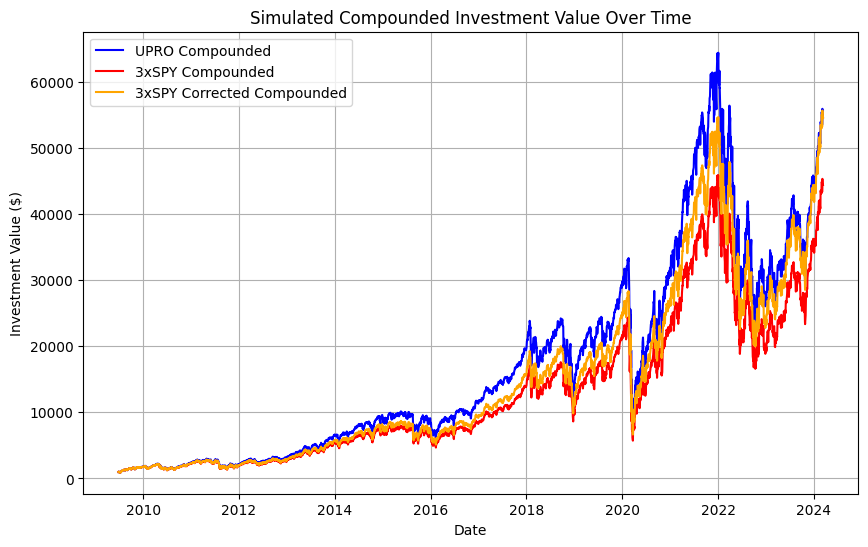

In [173]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_df.index, filtered_df['UPRO_compounded'], label='UPRO Compounded', color='blue')
plt.plot(filtered_df.index, filtered_df['3xSPY_compounded'], label='3xSPY Compounded', color='red')
plt.plot(filtered_df.index, filtered_df['3xSPY_corrected_compounded'], label='3xSPY Corrected Compounded', color='orange')
plt.title('Simulated Compounded Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.show()

Lets try to use daily magnitudes instead to correct for the difference between 3x SPY and UPRO


In [153]:
positive_days_diff = filtered_df[filtered_df['3xSPY'] > 0]['UPRO_3xSPY diff'].mean()
negative_days_diff = filtered_df[filtered_df['3xSPY'] < 0]['UPRO_3xSPY diff'].mean()

simulated_upro = []
for index, row in complete_df.iterrows():
    if row['3xSPY'] > 0:
        correction = positive_days_diff
    elif row['3xSPY'] < 0:
        correction = negative_days_diff
    else:
        correction = 0  # No change if 3xSPY had zero return
    simulated_upro_return = row['3xSPY'] + correction
    simulated_upro.append(simulated_upro_return)

complete_df['Simulated_UPRO'] = simulated_upro

In [154]:
complete_df

,3xSPY,3xTLT,UPRO,TMF,UPRO_3xSPY diff,3xSPY corrected,Simulated_UPRO
Date,,,,,,,
1993-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,2.133713,NaN,NaN,NaN,NaN,2.139264,2.111041
1993-02-02,0.635593,NaN,NaN,NaN,NaN,0.641145,0.612922
1993-02-03,3.171247,NaN,NaN,NaN,NaN,3.176799,3.148576
1993-02-04,1.255230,NaN,NaN,NaN,NaN,1.260781,1.232559
...,...,...,...,...,...,...,...
2024-03-05,-2.998240,4.272518,-3.037144,4.228441,-0.038903,-2.992689,-2.958026
2024-03-06,1.520175,1.760445,1.550628,1.650865,0.030453,1.525726,1.497503
2024-03-07,2.977929,-0.281268,2.901209,-0.431928,-0.076720,2.983480,2.955257


In [155]:
oldest_upro_date = complete_df['UPRO'].dropna().index.min()
updated_filtered_df = complete_df[complete_df.index >= oldest_upro_date]
display(updated_filtered_df)

,3xSPY,3xTLT,UPRO,TMF,UPRO_3xSPY diff,3xSPY corrected,Simulated_UPRO
Date,,,,,,,
2009-06-26,-0.781947,0.508300,-0.518435,0.578598,0.263512,-0.776395,-0.741732
2009-06-29,2.809236,0.444044,2.837223,0.119847,0.027987,2.814787,2.786564
2009-06-30,-2.427185,-0.506715,-2.387350,-0.598516,0.039834,-2.421633,-2.386970
2009-07-01,1.239820,-1.554397,1.072943,-1.083815,-0.166877,1.245372,1.217149
2009-07-02,-8.188035,0.701534,-8.252508,1.095690,-0.064473,-8.182484,-8.147820
...,...,...,...,...,...,...,...
2024-03-05,-2.998240,4.272518,-3.037144,4.228441,-0.038903,-2.992689,-2.958026
2024-03-06,1.520175,1.760445,1.550628,1.650865,0.030453,1.525726,1.497503
2024-03-07,2.977929,-0.281268,2.901209,-0.431928,-0.076720,2.983480,2.955257


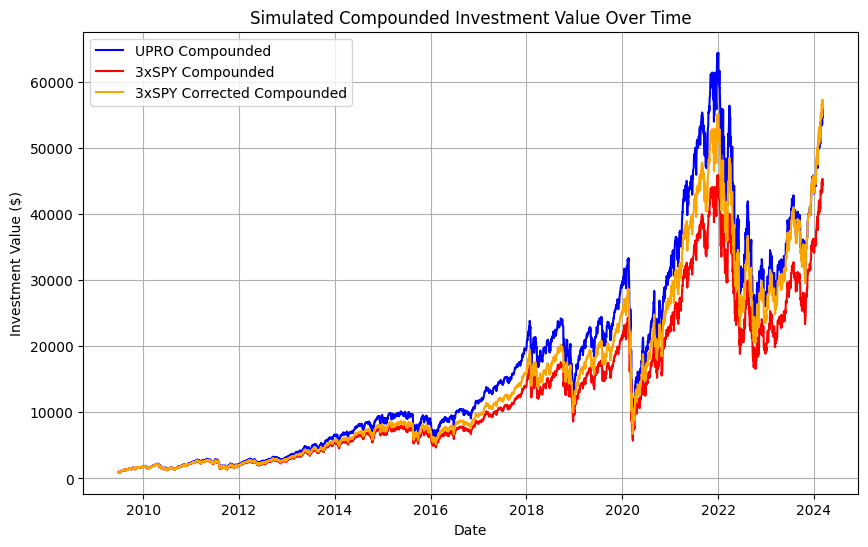

In [174]:
INITIAL_INVESTMENT = 1000

updated_filtered_df = updated_filtered_df.copy()

updated_filtered_df['UPRO_growth'] = 1 + (updated_filtered_df['UPRO'] / 100)
updated_filtered_df['3xSPY_growth'] = 1 + (updated_filtered_df['3xSPY'] / 100)

updated_filtered_df['UPRO_compounded'] = updated_filtered_df['UPRO_growth'].cumprod() * INITIAL_INVESTMENT
updated_filtered_df['3xSPY_compounded'] = updated_filtered_df['3xSPY_growth'].cumprod() * INITIAL_INVESTMENT

updated_filtered_df['Simulated_UPRO_Growth'] = 1 + (updated_filtered_df["Simulated_UPRO"] / 100)
updated_filtered_df['Simulated_UPRO_Growth_Compounded'] = updated_filtered_df['Simulated_UPRO_Growth'].cumprod() * INITIAL_INVESTMENT

plt.figure(figsize=(10, 6))
plt.plot(updated_filtered_df.index, updated_filtered_df['UPRO_compounded'], label='UPRO Compounded', color='blue')
plt.plot(updated_filtered_df.index, updated_filtered_df['3xSPY_compounded'], label='3xSPY Compounded', color='red')
plt.plot(updated_filtered_df.index, updated_filtered_df['Simulated_UPRO_Growth_Compounded'], label='3xSPY Corrected Compounded', color='orange')
plt.title('Simulated Compounded Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.show()

In [176]:
updated_filtered_df

,3xSPY,3xTLT,UPRO,TMF,UPRO_3xSPY diff,3xSPY corrected,Simulated_UPRO,UPRO_growth,3xSPY_growth,UPRO_compounded,3xSPY_compounded,3xSPY_corrected_growth,3xSPY_corrected_compounded,Simulated_UPRO_Growth,Simulated_UPRO_Growth_Compounded
Date,,,,,,,,,,,,,,,
2009-06-26,-0.781947,0.508300,-0.518435,0.578598,0.263512,-0.776395,-0.741732,0.994816,0.992181,994.815650,992.180534,0.992236,992.236047,0.992583,992.582680
2009-06-29,2.809236,0.444044,2.837223,0.119847,0.027987,2.814787,2.786564,1.028372,1.028092,1023.040784,1020.053222,1.028148,1020.165377,1.027866,1020.241631
2009-06-30,-2.427185,-0.506715,-2.387350,-0.598516,0.039834,-2.421633,-2.386970,0.976126,0.975728,998.617217,995.294648,0.975784,995.460713,0.976130,995.888770
2009-07-01,1.239820,-1.554397,1.072943,-1.083815,-0.166877,1.245372,1.217149,1.010729,1.012398,1009.331809,1007.634512,1.012454,1007.857897,1.012171,1008.010217
2009-07-02,-8.188035,0.701534,-8.252508,1.095690,-0.064473,-8.182484,-8.147820,0.917475,0.918120,926.036620,925.129046,0.918175,925.390090,0.918522,925.879355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05,-2.998240,4.272518,-3.037144,4.228441,-0.038903,-2.992689,-2.958026,0.969629,0.970018,53493.986168,43340.286380,0.970073,53208.288957,0.970420,54823.663130
2024-03-06,1.520175,1.760445,1.550628,1.650865,0.030453,1.525726,1.497503,1.015506,1.015202,54323.478926,43999.134451,1.015257,54020.101668,1.014975,55644.649192
2024-03-07,2.977929,-0.281268,2.901209,-0.431928,-0.076720,2.983480,2.955257,1.029012,1.029779,55899.516431,45309.397401,1.029835,55631.780725,1.029553,57289.091763


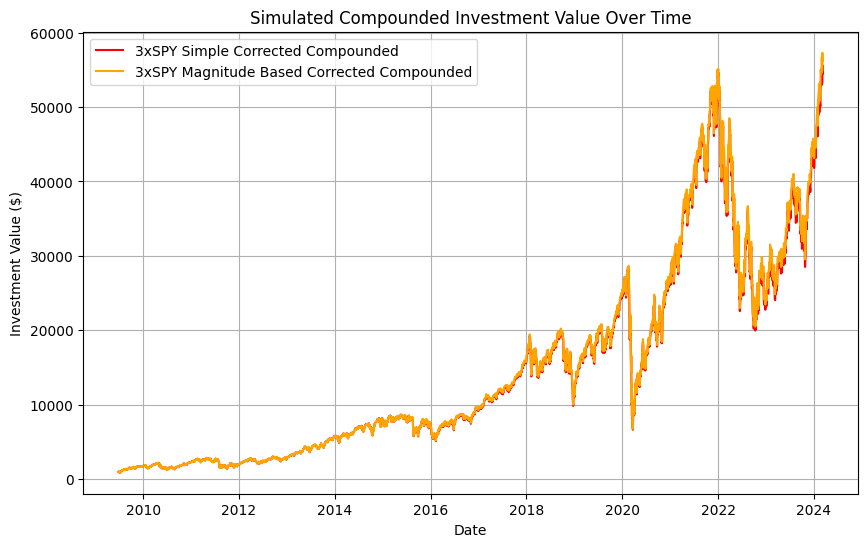

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(updated_filtered_df.index, updated_filtered_df['3xSPY_corrected_compounded'], label='3xSPY Simple Corrected Compounded', color='red')
plt.plot(updated_filtered_df.index, updated_filtered_df['Simulated_UPRO_Growth_Compounded'], label='3xSPY Magnitude Based Corrected Compounded', color='orange')
plt.title('Simulated Compounded Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.show()

Hardly any difference between the 2 correction strategies for simulating UPRO

## Comparing to HeadgeFundie's simulated data

In [182]:
TMFsim = pd.read_csv("./data/TMFSIM.csv")
UPROsim = pd.read_csv("./data/UPROSIM.csv")

UPROsim["UPRO"] = UPROsim["UPRO"].str.replace("%", "").astype("float")
TMFsim["TMF"] = TMFsim["TMF"].str.replace("%", "").astype("float")

In [183]:
TMFsim['Date'] = pd.to_datetime(TMFsim['Date'], format='%m/%d/%y')
UPROsim['Date'] = pd.to_datetime(UPROsim['Date'], format='%m/%d/%y')
UPROsim.rename(columns={'UPRO': 'UPRO_sim'}, inplace=True)
TMFsim.rename(columns={'TMF': 'TMF_sim'}, inplace=True)

In [184]:
corrected_df = updated_filtered_df.copy()

corrected_df = pd.merge(corrected_df, TMFsim.iloc[:, :-1], on='Date', how='outer')
corrected_df = pd.merge(corrected_df, UPROsim.iloc[:, :-1], on='Date', how='outer')
corrected_df.set_index(corrected_df.columns[0], inplace=True)

corrected_df.sort_values(by='Date', inplace=True)
corrected_df

,3xSPY,3xTLT,UPRO,TMF,UPRO_3xSPY diff,3xSPY corrected,Simulated_UPRO,UPRO_growth,3xSPY_growth,UPRO_compounded,3xSPY_compounded,3xSPY_corrected_growth,3xSPY_corrected_compounded,Simulated_UPRO_Growth,Simulated_UPRO_Growth_Compounded,TMF_sim,UPRO_sim
Date,,,,,,,,,,,,,,,,,
1986-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,3.7
1986-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,-0.7
1986-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,5.9
1986-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,1.4
1986-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05,-2.998240,4.272518,-3.037144,4.228441,-0.038903,-2.992689,-2.958026,0.969629,0.970018,53493.986168,43340.286380,0.970073,53208.288957,0.970420,54823.663130,NaN,NaN
2024-03-06,1.520175,1.760445,1.550628,1.650865,0.030453,1.525726,1.497503,1.015506,1.015202,54323.478926,43999.134451,1.015257,54020.101668,1.014975,55644.649192,NaN,NaN
2024-03-07,2.977929,-0.281268,2.901209,-0.431928,-0.076720,2.983480,2.955257,1.029012,1.029779,55899.516431,45309.397401,1.029835,55631.780725,1.029553,57289.091763,NaN,NaN


In [185]:
oldest_upro_date = corrected_df['UPRO'].dropna().index.min()
corrected_df_filtered = corrected_df[corrected_df.index >= oldest_upro_date]

In [187]:
corrected_df_filtered = corrected_df_filtered.copy()
corrected_df_filtered['HF_UPRO_Growth'] = 1 + (corrected_df_filtered["UPRO_sim"] / 100)
corrected_df_filtered['HF_UPRO_Compounded'] = corrected_df_filtered['HF_UPRO_Growth'].cumprod() * INITIAL_INVESTMENT

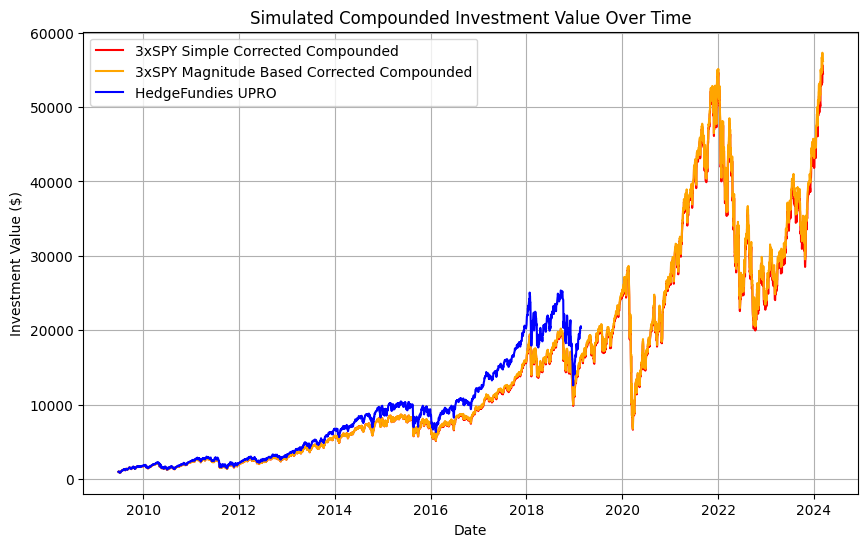

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(corrected_df_filtered.index, corrected_df_filtered['3xSPY_corrected_compounded'], label='3xSPY Simple Corrected Compounded', color='red')
plt.plot(corrected_df_filtered.index, corrected_df_filtered['Simulated_UPRO_Growth_Compounded'], label='3xSPY Magnitude Based Corrected Compounded', color='orange')
plt.plot(corrected_df_filtered.index, corrected_df_filtered['HF_UPRO_Compounded'], label='HedgeFundies UPRO', color='blue')
plt.title('Simulated Compounded Investment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)
plt.show()